<a href="https://colab.research.google.com/github/harshhrawte/Regularization-in-Neural-Networks/blob/main/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


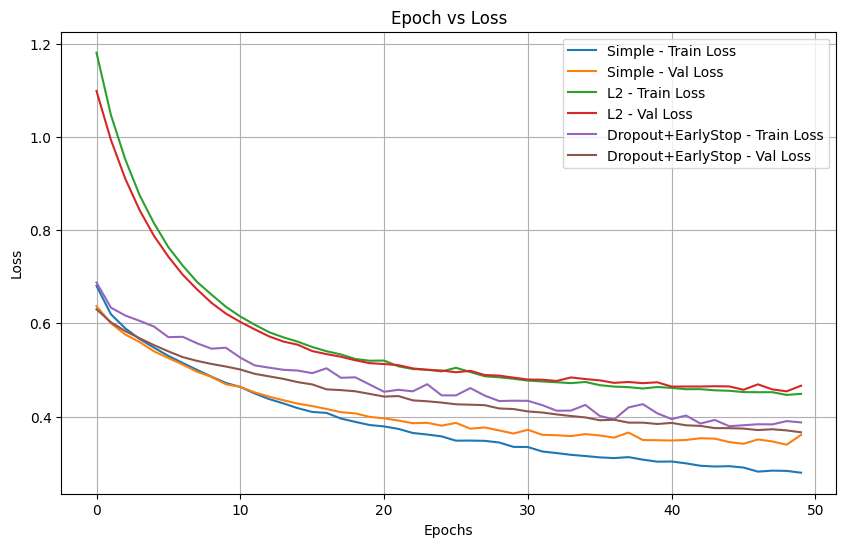

✅ Train Accuracy (Simple Model): 0.8711
✅ Train Accuracy (L2 Regularization): 0.8246
✅ Train Accuracy (Dropout + EarlyStopping): 0.8408


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/Medicaldataset.csv")

# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Already 0/1, but just to ensure
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})

# Separate features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to build model
def build_model(l2_reg=0.0, use_dropout=False):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(l2_reg)))
    if use_dropout:
        model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)))
    if use_dropout:
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Simple Model
simple_model = build_model()
history_simple = simple_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
simple_acc = simple_model.evaluate(X_train, y_train, verbose=0)[1]

# Train L2 Regularized Model
l2_model = build_model(l2_reg=0.01)
history_l2 = l2_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
l2_acc = l2_model.evaluate(X_train, y_train, verbose=0)[1]

# Train Dropout + EarlyStopping Model
dropout_model = build_model(use_dropout=True)
history_dropout = dropout_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop], verbose=0)
dropout_acc = dropout_model.evaluate(X_train, y_train, verbose=0)[1]

# Plot Loss curves
plt.figure(figsize=(10,6))
plt.plot(history_simple.history['loss'], label='Simple - Train Loss')
plt.plot(history_simple.history['val_loss'], label='Simple - Val Loss')
plt.plot(history_l2.history['loss'], label='L2 - Train Loss')
plt.plot(history_l2.history['val_loss'], label='L2 - Val Loss')
plt.plot(history_dropout.history['loss'], label='Dropout+EarlyStop - Train Loss')
plt.plot(history_dropout.history['val_loss'], label='Dropout+EarlyStop - Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.grid()
plt.show()

# Print train accuracies
print(f"✅ Train Accuracy (Simple Model): {simple_acc:.4f}")
print(f"✅ Train Accuracy (L2 Regularization): {l2_acc:.4f}")
print(f"✅ Train Accuracy (Dropout + EarlyStopping): {dropout_acc:.4f}")
